# Fontes de Dados 🚰 🎲

## Sumário da Aula

<ul>
    <li>Raspagem Básica de Dados ✂️</li>
    <ul>
        <li>BeautifulSoup</li>
        <li>Selenium</li>
    </ul>
    <li>Juntando as Peças 🧩</li>
    <ul>
        <li>Raspagem Avançada de Dados ✂️</li>
        <ul>
            <li>BeautifulSoup</li>
            <li>Selenium</li>
        </ul>
        <li>API Avançada 📝</li>
    </ul>
</ul>

## Raspagem Básica de Dados ✂️

"Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites."

👉 Web Scraping \& Data Analysis <a href='https://gist.github.com/kmcelwee/309ec6b3eae932530c1ef7b15fb325dc'>cheat sheet</a>

<pre>Inicialmente, vamos criar um protótipo de página HTML para entender como funciona sua estrutura para rasparmos os dados</pre>

```html
<!DOCTYPE html>
<html>
<head>
    <title>Exemplo de Pagina HTML</title>
</head>
<body>
    <h1>Minha Primeira Pagina HTML</h1>
    
    <ul>
        <li><a href="https://www.enap.gov.br/pt/">Home</a></li>
        <li><a href="#">Sobre</a></li>
        <li><a href="#">Contato</a></li>
    </ul>
    
    <p>Bem-vindo 'a minha primeira pagina HTML!</p>
    <p>Esta é uma pagina de exemplo para demonstrar a estrutura basica do HTML.</p>
    
    <footer>
        <p>&copy;Thais Company. Rua XXX</p>
    </footer>
</body>
</html>
````

<pre>Agora, vamos explicar algumas tags</pre>

```html

```<!DOCTYPE html>```: define o tipo de documento como HTML5.

```<html>...</html>```: define o início e o fim do documento HTML.

```<head>...</head>```: contém informações sobre o documento, como o título da página.

```<title>...</title>```: define o título da página exibido na aba do navegador.

```<body>...</body>```: contém o conteúdo visível da página.

```<h1>...</h1>```: cria um cabeçalho de nível 1 (o maior).

```<ul>...</ul>```: cria uma lista não ordenada.

```<li>...</li>```: define um item da lista.

```<a href="#">...</a>```: cria um link vazio para fins de exemplo.

```<p>...</p>```: cria parágrafos de texto.

```<footer>...</footer>```: define o rodapé da página.

```&copy;```: entidade HTML para o símbolo de direitos autorais.

👉 dica: aprenda mais em <a href='https://www.w3schools.com/html/'>HTML Tutorials</a>

<pre>Um site clássico da Internet brasileira, é o <a href='http://www.pudim.com.br'>http://pudim.com.br/</a>.

👉 dica: <a href='https://support.google.com/campaignmanager/answer/2828688?hl=pt-BR'>aprenda a usar a ferramenta de desenvolvedor</a> para ver as tags do HTML

<center><img src='http://www.pudim.com.br/pudim.jpg' width=600></center>

### BeautifulSoup

"Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup)."

👉 BeautifulSoup <a href='https://michaelcurrin.github.io/dev-cheatsheets/cheatsheets/python/libraries/beautifulsoup.html'>cheat sheet</a>

#### Biblioteca Principal 📚: <a href='https://beautiful-soup-4.readthedocs.io/en/latest/'>BeautifulSoup</a>

In [1]:
from bs4 import BeautifulSoup

Resumidamente, o roteiro de uma raspagem de dados se dá com os seguintes passos:
<ul>
    <li>Escolher a URL;</li>
    <li>Acessar os dados dessa página;</li>
    <li>Extrair as informações que precisamos; e</li>
    <li>Armazenar essas informações.</li>
</ul>

#### Passo 1 - Escolher a URL

<pre>Vamos usar como exemplo a página <a href='https://www.imdb.com/list/ls055386972/'><i>Top 50 Best Movies Ever Made</i></a> do site do IMDB</pre>

In [2]:
url = 'https://www.imdb.com/list/ls055386972/'

#### Passo 2 - Acessar os dados dessa página

<pre>Agora, vamos reaproveitar a função de ler uma página na Internet, construída na aula passada</pre>

In [3]:
import requests

def read_file(url):
    response = requests.get(url)

    if response.status_code == 200:
        content = response.content
        return content

In [4]:
content = read_file(url)
content[:200]

b'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascri'

#### Passo 3 - Extrair as informações que precisamos

<pre>Começamos por usar o BeautifulSoup, fazendo a leitura da página HTML com a biblioteca...</pre>

In [5]:
soup = BeautifulSoup(content, 'html.parser')

<pre>... e passamos a extrair os dados conforme nossas necessidades, usando as tags do HTML.</pre>

In [6]:
# Encontrando o título do primeiro filme
soup.find("h3").find("a").string

'O Poderoso Chefão'

In [7]:
# Encontrando a duração do primeiro filme
soup.find("span", class_="runtime").string

'175 min'

#### Passo 4 - Armazenar as informações

<pre>Por fim, com o BeautifulSoup, podemos percorrer todos os filmes e armazenar seus títulos e durações...</pre>

In [8]:
filmes = []

for filme in soup.find_all("div", class_="lister-item-content"):
    title = filme.find("h3").find("a").string
    duration = filme.find("span", class_="runtime").string
    filmes.append({'titulo': title, 'duração': duration})

... bem como utilizar as informações armazenadas.

In [9]:
for filme in filmes[0:3]:
    print(f"Título: {filme['titulo']}")
    print(f"Duração: {filme['duração']}", end='\n\n')

Título: O Poderoso Chefão
Duração: 175 min

Título: A Lista de Schindler
Duração: 195 min

Título: 12 Homens e uma Sentença
Duração: 96 min



### Selenium

"Selenium is an open source umbrella project for a range of tools and libraries aimed at supporting browser automation."

Alguns exemplos do uso do Selenium:
<ul>
    <li>Preencher formulários;</li>
    <li>Automatizar tarefas repetitivas;</li>
    <li>Automatizar teste de software de aplicativos web.</li>
</ul>

👉 Selenium <a href='https://intellipaat.com/blog/wp-content/uploads/2022/10/Selenium-Cheat-Sheet-2022.jpg'>cheat sheet</a>

#### Biblioteca Principal 📚: <a href='https://selenium-python.readthedocs.io/getting-started.html'>Selenium</a>

<img src="https://avatars.githubusercontent.com/u/983927" width="100" style="float: right;">

In [10]:
!pip install --upgrade selenium --quiet

In [11]:
from selenium import webdriver

Resumidamente, o roteiro de uma automatização com o Selenium se dá com os seguintes passos:

<ul>
    <li>Crie uma instância do navegador que você deseja automatizar com o webdriver;</li>
    <ul>
        <li>Você pode escolher entre vários: Chrome, Firefox, Edge, Safari, etc.</li>
    </ul>
    <li>Defina a página que ele vai navegar (usando o .get);</li>
    <li>Encontre o elemento para interação na página de navegação (usualmente com o .find_element);</li>
    <li>Interaja simulando clique(s) com o mouse (usualmente com o .click); e</li>
    <li>Destrua a instância do navegador que foi utilizado para automatizar a tarefa (com o .quit).</li>
</ul>

#### Passo 1 - Criar Instância do Navegador

<pre>Vamos usar como exemplo a página https://covid.saude.gov.br/ do Ministério da Saúde</pre>

In [12]:
driver = webdriver.Chrome() 

<img src='figs/chrome.png'>

#### Passo 2 - Definir a Página a Navegar

<pre>Agora, vamos inserir o endereço que o Selenium realizará sua tarefa</pre>

In [13]:
driver.get("https://covid.saude.gov.br/")

<img src='figs/covid.png'>

#### Passo 3 - Encontrar Elemento para Interagir

👉 Xpath <a href='https://devhints.io/xpath'>cheat sheet</a>

<pre>Vamos definir o caminho que será percorrido na página, usando Xpath, para encontrar o botão da página para baixarmos os arquivos csv...</pre>

In [14]:
caminho = './html/body/app-root/ion-app/ion-router-outlet/app-home/'
caminho += 'ion-content/div[1]/div[2]/ion-button'
file = driver.find_element('xpath', caminho)

#### Passo 4 - Simule clique do mouse

<pre>... e simulamos o clique do mouse para efetivamente baixarmos os arquivos.</pre>

In [15]:
file.click()

<img src='figs/click.png'>

#### Passo 5 - Destrua a instância do navegador

<pre>Por fim, com a tarefa concluída, precisamos destruir a instância do navegador.</pre>

In [16]:
driver.quit()

## Juntando as Peças 🧩

### Raspagem Avançada de Dados ✂️

#### BeautifulSoup

In [17]:
import os, json

##### Funções Auxiliares

In [18]:
"""
workaround para contornar a exceção: \
    SSLError: [SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] \
    unsafe legacy renegotiation disabled (_ssl.c:997)

é possível considerando que estamos tratando apenas de dados públicos
"""

import requests, urllib3, ssl

class CustomHttpAdapter (requests.adapters.HTTPAdapter):
    def __init__(self, ssl_context=None, **kwargs):
        self.ssl_context = ssl_context
        super().__init__(**kwargs)
    def init_poolmanager(self, connections, maxsize, block=False):
        self.poolmanager = urllib3.poolmanager.PoolManager(
            num_pools=connections, maxsize=maxsize,
            block=block, ssl_context=self.ssl_context)
def get_legacy_session():
    ctx = ssl.create_default_context(ssl.Purpose.SERVER_AUTH)
    ctx.options |= 0x4  # OP_LEGACY_SERVER_CONNECT
    session = requests.session()
    session.mount('https://', CustomHttpAdapter(ctx))
    return session

In [19]:
def build_path(subfolder = 'raw'):
    folderpath = os.path.join(os.getcwd(), os.pardir, 
                              'project', 'data', subfolder)
    folderpath = os.path.abspath(folderpath)
    if not os.path.exists(folderpath): os.makedirs(folderpath)
    return folderpath

<pre>Agora, vamos raspar os dados do IBGE disponíveis em https://ibge.gov.br/cidades-e-estados/</pre>

<pre>Vamos escolher arbitrariamente um estado como nosso estudo de caso...</pre>

<pre>... e vamos acessar o conteúdo da página correspondente.</pre>

In [20]:
lower_state = 'ce'
url = f'https://ibge.gov.br/cidades-e-estados/{lower_state}.html'

response = get_legacy_session().get(url)
content = response.content
content[:200]

b'\xef\xbb\xbf\n<!DOCTYPE HTML>\n\n<html lang="pt-BR">\n\n<head>\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n  \n    <!-- Global site '

<pre>pausa para transformar em função o que fizemos até agora, com a finalidade de reúso...</pre>

In [21]:
def scrape_from_internet(url, lower_state):
    URL_STATE = f'{url}/{lower_state}.html'
    try:
        response = requests.get(f'{URL_STATE}')
    except requests.exceptions.SSLError:
        response = get_legacy_session().get(f'{URL_STATE}')
    return response.content

<pre>... e testar nosso código</pre>

In [22]:
url = 'https://ibge.gov.br/cidades-e-estados'
lower_state = 'ce'
content = scrape_from_internet(url, lower_state)
content[:200]

b'\xef\xbb\xbf\n<!DOCTYPE HTML>\n\n<html lang="pt-BR">\n\n<head>\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n  \n    <!-- Global site '

<pre>... segundo, vamos descobrir os indicadores disponibilizados no sítio...</pre>

In [23]:
#código novo (continuando o anterior)
indicators_soup = BeautifulSoup(content, 'html.parser')
all_indicators = indicators_soup.find_all('div', class_='indicador')
indicator = all_indicators[0]
indicator

<div class="indicador"><div class="ind-label"><p>Governador</p></div><p class="ind-value">ELMANO DE FREITAS DA COSTA<small>   [2023]</small></p></div>

<pre>pausa para transformar em função o que fizemos até agora, com a finalidade de reúso...</pre>

In [24]:
def html_indicators(content):
    indicators_soup = BeautifulSoup(content, 'html.parser')
    all_indicators = indicators_soup.find_all('div', 
                                              class_='indicador')
    return all_indicators

<pre>... e testar nosso código</pre>

In [25]:
url = 'https://ibge.gov.br/cidades-e-estados'
lower_state = 'ce'
content = scrape_from_internet(url, lower_state)
indicators = html_indicators(content)
indicators[0]

<div class="indicador"><div class="ind-label"><p>Governador</p></div><p class="ind-value">ELMANO DE FREITAS DA COSTA<small>   [2023]</small></p></div>

<pre>... terceiro, no indicador, vamos extrair os pedaços de informação que nos interessam...</pre>

<pre>... inicialmente, pela prova de conceito de extrair informações do primeiro indicador...</pre>

In [26]:
indicator = all_indicators[0]

In [27]:
#código novo (continuando o anterior)
label = indicator.find('div', class_='ind-label')
value = indicator.find('p', class_='ind-value').\
                    get_text(strip=False)
measure = indicator.find('span', class_='indicador-unidade')
measure = measure.get_text(strip=True) if measure else '\xa0'
{'label': label.get_text(strip=True), \
        'value': [x.strip() for x in value.split(measure)][0], \
        'measure': measure.strip()}

{'label': 'Governador', 'value': 'ELMANO DE FREITAS DA COSTA', 'measure': ''}

<pre>pausa para transformar em função o que fizemos até agora, com a finalidade de reúso...</pre>

In [28]:
def parse_indicator(indicator):
    label = indicator.find('div', class_='ind-label')
    value = indicator.find('p', class_='ind-value').get_text(strip=False)
    measure = indicator.find('span', class_='indicador-unidade')
    measure = measure.get_text(strip=True) if measure else '\xa0'

    return {'label': label.get_text(strip=True), \
            'value': [x.strip() for x in value.split(measure)][0], \
            'measure': measure.strip()}

<pre>... e testar nosso código</pre>

In [29]:
url = 'https://ibge.gov.br/cidades-e-estados'
lower_state = 'ce'
content = scrape_from_internet(url, lower_state)
all_indicators = html_indicators(content)
indicator = all_indicators[0]
parse_indicator(indicator)

{'label': 'Governador', 'value': 'ELMANO DE FREITAS DA COSTA', 'measure': ''}

<pre>... posteriomente, pela extração de informações de todos os indicadores...</pre>

In [30]:
#novo código
list_of_indicators = []

for indicator in all_indicators:
    list_of_indicators.append(parse_indicator(indicator))

In [31]:
list_of_indicators[:3]

[{'label': 'Governador', 'value': 'ELMANO DE FREITAS DA COSTA', 'measure': ''},
 {'label': 'Capital', 'value': 'Fortaleza', 'measure': ''},
 {'label': 'Gentílico', 'value': 'cearense', 'measure': ''}]

<pre>pausa para transformar em função o que fizemos até agora, com a finalidade de reúso...</pre>

In [32]:
def parse_indicators(all_indicators):
    list_of_indicators = []

    for indicator in all_indicators:
        list_of_indicators.append(parse_indicator(indicator))
        
    return list_of_indicators

<pre>... e testar nosso código</pre>

In [33]:
url = 'https://ibge.gov.br/cidades-e-estados'
lower_state = 'ce'
content = scrape_from_internet(url, lower_state)
all_indicators = html_indicators(content)
parsed_indicators = parse_indicators(all_indicators)
parsed_indicators[:3]

[{'label': 'Governador', 'value': 'ELMANO DE FREITAS DA COSTA', 'measure': ''},
 {'label': 'Capital', 'value': 'Fortaleza', 'measure': ''},
 {'label': 'Gentílico', 'value': 'cearense', 'measure': ''}]

<pre>... agora, observe que podemos condensar os passos anteriores em uma única função...</pre>

In [34]:
def parse_page(url, lower_state):
    content = scrape_from_internet(url, lower_state)
    all_indicators = html_indicators(content)
    return parse_indicators(all_indicators)

In [35]:
parse_page('https://ibge.gov.br/cidades-e-estados', 'ce')[:3]

[{'label': 'Governador', 'value': 'ELMANO DE FREITAS DA COSTA', 'measure': ''},
 {'label': 'Capital', 'value': 'Fortaleza', 'measure': ''},
 {'label': 'Gentílico', 'value': 'cearense', 'measure': ''}]

<pre>por fim, precisamos da lista de estados para consolidar a raspagem estado por estado...</pre>

In [37]:
input_filename = 'estados_codigos.json'

folderpath = build_path()
inputpath = os.path.join(folderpath, input_filename)

lower_states = []
with open(inputpath) as jsonfile:
    json_states = json.load(jsonfile)
    for json_state in json_states:
        lower_state = json_state['sigla'].lower()
        lower_states.append(lower_state)

lower_states[:3]

['ro', 'ac', 'am']

<pre>... para percorrermos todos os estados, raspar todos os dados, e armazenar tudo em dicionário...</pre>

In [38]:
json_states_characteristics = []
for lower_state in lower_states:
    json_states_characteristics.append(\
        {'state': lower_state,\
         'characteristics': parse_page(url, lower_state)})

In [39]:
json_states_characteristics[0]['state']

'ro'

In [40]:
json_states_characteristics[0]['characteristics'][:3]

[{'label': 'Governador',
  'value': 'MARCOS JOSÉ ROCHA DOS SANTOS',
  'measure': ''},
 {'label': 'Capital', 'value': 'Porto Velho', 'measure': ''},
 {'label': 'Gentílico', 'value': 'rondoniense ou rondoniano', 'measure': ''}]

<pre>... e armazenar tudo no sistema de arquivos.</pre>

In [41]:
output_filename = 'estados_caracteristicas.json'

outputpath = os.path.join(folderpath, output_filename)
with open(outputpath, mode='w') as jsonfile:
    json.dump(json_states_characteristics, jsonfile)

<pre>pausa para transformar em função o que fizemos até agora, com a finalidade de reúso...</pre>

In [42]:
import json

def access_pages_and_save(url, input_filename, output_filename):

    folderpath = build_path()
    inputpath = os.path.join(folderpath, input_filename)

    lower_states = []
    with open(inputpath) as jsonfile:
        json_states = json.load(jsonfile)
        for json_state in json_states:
            lower_state = json_state['sigla'].lower()
            lower_states.append(lower_state)        

    json_states_characteristics = []
    for lower_state in lower_states:
        json_states_characteristics.append(\
            {'state': lower_state,\
             'characteristics': parse_page(url, lower_state)})

    outputpath = os.path.join(folderpath, output_filename)
    with open(outputpath, mode='w') as jsonfile:
        json.dump(json_states_characteristics, jsonfile)

<pre>... e testar nosso código</pre>

In [43]:
access_pages_and_save(url = 'https://ibge.gov.br/cidades-e-estados',
                      input_filename = 'estados_codigos.json',
                      output_filename = 'estados_caracteristicas.json')

### Raspagem Avançada de Dados ✂️

#### Selenium

##### Funções Auxiliares

In [44]:
import os, time, csv

<pre>Agora, vamos raspar os dados de Covid disponíveis em https://covid.saude.gov.br/ com Selenium</pre>

<pre>Inicialmente, vamos baixar os dados em uma pasta temporária em project/tmp</pre>

In [45]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

In [46]:
url = 'https://covid.saude.gov.br/'
folderpath = build_path('tmp')

options = Options()
prefs = {'download.default_directory' : folderpath}
options.add_experimental_option('prefs', prefs)
driver = webdriver.Chrome(options=options)
driver.get(url)

button = driver.find_element(By.XPATH, 
                             "//*[contains(text(), 'Arquivo CSV')]")
time.sleep(2) #precisamos pausar 2 segundos para não travar o download
button.click()

<pre>Vamos ver se o arquivo foi baixado.</pre>

In [47]:
!tree {folderpath}

/Users/heliomacedofilho/code/heliomacedofilho/aspectos-de-programacao-para-ciencia-de-dados/bootcamp/project/data/tmp

0 directories, 0 files


<pre>Alternativamente, podemos fazer uma função para verificar se o arquivo foi baixado e obter o seu caminho absoluto</pre>

In [48]:
def file_exists(filename_start = 'HIST_PAINEL_COVID'):
    folderpath = build_path('tmp')
    compressed_filepath = None

    for file in os.listdir(folderpath):
        if file.startswith(filename_start) and file.endswith('.zip'):
            compressed_filepath = os.path.join(folderpath, file)
    
    return compressed_filepath

In [49]:
compressed_filepath = None
while compressed_filepath is None:
    time.sleep(1)
    compressed_filepath = file_exists()
compressed_filepath

'/Users/heliomacedofilho/code/heliomacedofilho/aspectos-de-programacao-para-ciencia-de-dados/bootcamp/project/data/tmp/HIST_PAINEL_COVIDBR_29set2023.zip'

<pre>Com a certeza de que o arquivo foi finalmente baixado, podemos fechar a janela do navegador.</pre>

In [50]:
driver.close()

<pre>pausa para transformar em função o que fizemos até agora, com a finalidade de reúso...</pre>

In [51]:
def open_browser_and_save(url = 'https://covid.saude.gov.br/',
                          filename_start = 'HIST_PAINEL_COVID'):
    folderpath = build_path('tmp')

    #trecho incluído para limpar a pasta tmp
    for file in os.listdir(folderpath):
        if file.startswith('HIST_PAINEL_COVID'):
            filepath = os.path.join(folderpath, file)
            os.remove(filepath)
    
    options = Options()
    prefs = {'download.default_directory' : folderpath}
    options.add_experimental_option('prefs', prefs)
    driver = webdriver.Chrome(options=options)
    driver.get(url)

    button = driver.find_element(By.XPATH,
                                 "//*[contains(text(), 'Arquivo CSV')]")
    time.sleep(2)
    button.click()

    #código aperfeiçoado para fechar a janela no fim do download
    compressed_filepath = None
    while compressed_filepath is None:
        time.sleep(1)
        compressed_filepath = file_exists()

    driver.close()
    
    return compressed_filepath

<pre>... e testar nosso código</pre>

In [52]:
compressed_filepath = open_browser_and_save()
compressed_filepath

'/Users/heliomacedofilho/code/heliomacedofilho/aspectos-de-programacao-para-ciencia-de-dados/bootcamp/project/data/tmp/HIST_PAINEL_COVIDBR_29set2023.zip'

<pre>Neste momento, precisamos extrair todos os arquivos que estão inclusos no arquivo zipado...</pre>

In [53]:
from zipfile import ZipFile

compressed_folderpath = os.path.split(compressed_filepath)[0]

if compressed_filepath.endswith('.zip'):
    with ZipFile(compressed_filepath, 'r') as file:
        file.extractall(path=compressed_folderpath)
        file.close()

<pre>... e remover o arquivo zipado</pre>

In [54]:
os.remove(compressed_filepath)

<pre>pausa para transformar em função o que fizemos até agora, com a finalidade de reúso...</pre>

In [55]:
from zipfile import ZipFile

def extract_folder(compressed_filepath, 
                   filename_start = 'HIST_PAINEL_COVID'):
    compressed_folderpath = os.path.split(compressed_filepath)[0]
    
    if compressed_filepath.endswith('.zip'):
        with ZipFile(compressed_filepath, 'r') as file:
            file.extractall(path=compressed_folderpath)
            file.close()

    os.remove(compressed_filepath)

<pre>... e testar nosso código</pre>

In [56]:
compressed_filepath = open_browser_and_save()
extract_folder(compressed_filepath)

<pre>por fim, veja que os arquivos têm a mesma estrutura e agora podemos juntá-los, bem como salvá-los na pasta raw</pre>

<pre>primeiro, lemos os arquivos csv e armazenamos em memória...</pre>

In [57]:
folderpath = build_path('tmp')

header, rows = None, []
for file in os.listdir(folderpath):
    if file.startswith('HIST_PAINEL_COVID') and file.endswith('.csv'):
        filepath = os.path.join(folderpath, file)
        with open(filepath, encoding='utf-8') as csvfile:
            csvreader = csv.DictReader(csvfile, delimiter=';')
            header = csvreader.fieldnames
            for row in csvreader: rows.append(row)

<pre>... depois, escrevemos da memória para o arquivo csv que ficará armazenado na pasta project/raw.</pre>

In [58]:
filepath = os.path.join(build_path('raw'), 'ALL_HIST_PAINEL_COVID.csv')
with open(filepath, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=header, delimiter=';')
    writer.writeheader()
    for row in rows: writer.writerow(row)

In [59]:
f'vamos ler a linha {len(rows) // 2}'

'vamos ler a linha 3602213'

In [60]:
rows[len(rows) // 2]

{'regiao': 'Centro-Oeste',
 'estado': 'GO',
 'municipio': 'Itapuranga',
 'coduf': '52',
 'codmun': '521120',
 'codRegiaoSaude': '52012',
 'nomeRegiaoSaude': 'RIO VERMELHO',
 'data': '2021-03-19',
 'semanaEpi': '11',
 'populacaoTCU2019': '25768',
 'casosAcumulado': '1757',
 'casosNovos': '7',
 'obitosAcumulado': '42',
 'obitosNovos': '0',
 'Recuperadosnovos': '',
 'emAcompanhamentoNovos': '',
 'interior/metropolitana': '0'}

<pre>pausa para transformar em função o que fizemos até agora, com a finalidade de reúso...</pre>

In [61]:
def concatenate_datasets(filename_start = 'HIST_PAINEL_COVID'):
    folderpath = build_path('tmp')

    header, rows = None, []
    for file in os.listdir(folderpath):
        if file.startswith(filename_start) and file.endswith('.csv'):
            filepath = os.path.join(folderpath, file)
            with open(filepath, encoding='utf-8') as csvfile:
                csvreader = csv.DictReader(csvfile, delimiter=';')
                header = csvreader.fieldnames
                for row in csvreader: rows.append(row)
            #os.remove(filepath)

    folderpath = build_path('raw')
    filepath = os.path.join(folderpath, 'ALL_' + filename_start + '.csv')
    with open(filepath, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=header, delimiter=';')
        writer.writeheader()
        for row in rows: writer.writerow(row)

<pre>... e testar nosso código</pre>

In [62]:
compressed_filepath = open_browser_and_save()
extract_folder(compressed_filepath)
concatenate_datasets()

In [63]:
folderpath = build_path()
!tree {folderpath}

/Users/heliomacedofilho/code/heliomacedofilho/aspectos-de-programacao-para-ciencia-de-dados/bootcamp/project/data/raw
├── ALL_HIST_PAINEL_COVID.csv
├── estados_caracteristicas.json
└── estados_codigos.json

1 directory, 3 files


<pre>🚨 spoiler: nós ainda não aprendemos pandas 🐼, mas veja como será simples e amigável ler o csv de covid</pre>

In [64]:
from pandas import read_csv

covid_df = read_csv(filepath, delimiter=';')
covid_df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-01,31,210147125.0,2707877.0,45392,93563,1088,1865729.0,748585.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-02,32,210147125.0,2733677.0,25800,94104,541,1883677.0,755896.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-03,32,210147125.0,2750318.0,16641,94665,561,1912319.0,743334.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-04,32,210147125.0,2801921.0,51603,95819,1154,1970767.0,735335.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-08-05,32,210147125.0,2857597.0,55676,97240,1421,2020637.0,741180.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204421,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-25,39,3015268.0,916276.0,0,11896,0,NaN,NaN,1.0
7204422,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-26,39,3015268.0,916276.0,0,11896,0,NaN,NaN,1.0
7204423,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-27,39,3015268.0,916276.0,0,11896,0,NaN,NaN,1.0
7204424,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2023-09-28,39,3015268.0,916276.0,0,11896,0,NaN,NaN,1.0


## API Avançada 📝

In [65]:
#https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao

### Biblioteca Principal 📚: <a href='https://elasticsearch-py.readthedocs.io/en/v8.6.0/'>ElasticSearch</a>

In [66]:
!pip install --upgrade elasticsearch --quiet

In [67]:
from elasticsearch import Elasticsearch

<img src="https://images.contentstack.io/v3/assets/bltefdd0b53724fa2ce/blt280217a63b82a734/6202d3378b1f312528798412/elastic-logo.svg" width="100" style="float: right;">

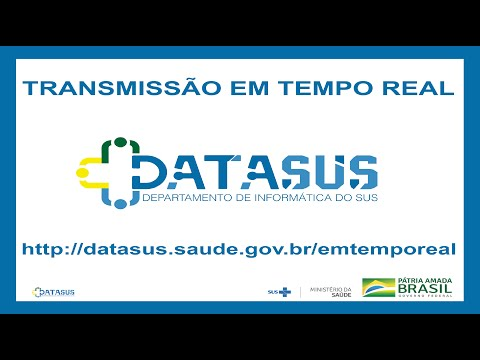

In [68]:
from IPython.display import YouTubeVideo
YouTubeVideo(id='nKsM1sog1wI')

#### Funções Auxiliares

In [69]:
import os, json

def access_elasticsearch_and_save(url, filename):
    folderpath = build_path()
    filepath = os.path.join(folderpath, filename)
    
    es = Elasticsearch([{'scheme': 'https', 'host': url, 'port': 443}], \
                       basic_auth=('imunizacao_public', 
                                   'qlto5t&7r_@+#Tlstigi'),
                       request_timeout=60)

    #apenas cidades acima de 300k habitantes estão no índice
    #quando consulta mais de 83 municípios, 
    #a API apresenta a exceção "ApiError"
    
    aggs = {
        'Paciente_Estado' if 'estado' in filename else 'Paciente_Municipio': {
            'terms': {'field': 'paciente_endereco_uf' if 'estado' in filename else 'paciente_endereco_coIbgeMunicipio', 
                      'min_doc_count': 1, 
                      'order': {'_count': 'desc'},
                      'size': 27 if 'estados' in filename else 60},
            'aggs': {
                'Data_Aplicacao_Vacina': {
                    'date_histogram': {'field': 'vacina_dataAplicacao', 
                                       'calendar_interval': 'day', 
                                       'min_doc_count': 1, 
                                       'order': {'_key': 'desc'}},
                }
            }
        }
    }

    res = es.search(size = 0, aggs = aggs)

    with open(filepath, mode='w') as jsonfile:
        json.dump(res['aggregations'], jsonfile)

In [70]:
access_elasticsearch_and_save('imunizacao-es.saude.gov.br', 
                              'estados_vacinacao.json')

In [71]:
access_elasticsearch_and_save('imunizacao-es.saude.gov.br', 
                              'municipios_vacinacao.json')